In [46]:
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
data=load_diabetes()

In [7]:
dep_var=pd.DataFrame(data["data"],columns=data["feature_names"])

In [8]:
dep_var

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


# Using Z Score

<Axes: >

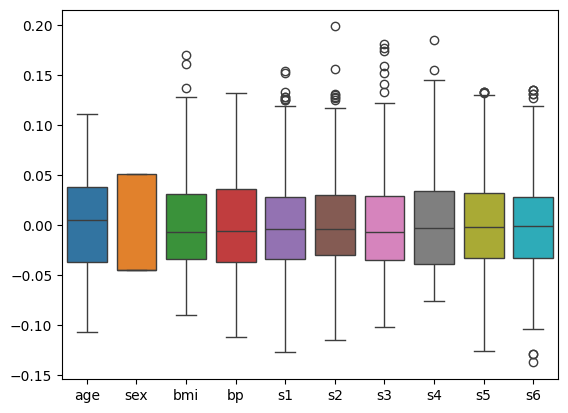

In [10]:
sns.boxplot(data=dep_var)

<Axes: ylabel='s3'>

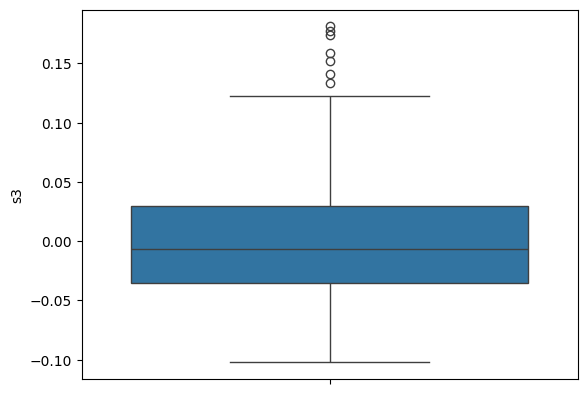

In [11]:
sns.boxplot(data=dep_var["s3"])

In [27]:
def find_outlier(column):
  mean=column.mean()
  std=column.std()
  lower_limit=mean-3*std
  upper_limit=mean+3*std
  return lower_limit,upper_limit

In [28]:
dep_var["s3"].std()

0.047619047619047596

In [29]:
find_outlier(dep_var["s3"])

(-0.1428571428571428, 0.1428571428571428)

In [30]:
dep_var["s3"].shape

(442,)

In [32]:
dep_var["bmi"].apply(lambda x:x if x< find_outlier(dep_var["bmi"])[1] and x>find_outlier(dep_var["bmi"])[0] else None).dropna().shape

(440,)

In [33]:
dep_var["bmi"].shape

(442,)

# Using IQR (Inter quatile range)

In [38]:
dep_var.sort_values(by="s3")

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
32,0.034443,0.050680,0.125287,0.028758,-0.053855,-0.012900,-0.102307,0.108111,0.000272,0.027917
349,0.001751,0.050680,-0.057941,-0.043542,-0.096510,-0.047034,-0.098625,0.034309,-0.061176,-0.071494
322,0.023546,0.050680,0.061696,0.062050,0.024574,-0.036073,-0.091262,0.155345,0.133397,0.081764
61,-0.041840,0.050680,0.004572,-0.053870,-0.044223,-0.027305,-0.080217,0.071210,0.036644,0.019633
141,-0.027310,-0.044642,0.047685,-0.046985,0.034206,0.057245,-0.080217,0.130252,0.045067,0.131470
...,...,...,...,...,...,...,...,...,...,...
260,0.041708,-0.044642,-0.008362,-0.057313,0.008063,-0.031376,0.151726,-0.076395,-0.080237,-0.017646
269,0.009016,-0.044642,-0.032073,-0.026328,0.042462,-0.010395,0.159089,-0.076395,-0.011897,-0.038357
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064
261,0.048974,-0.044642,-0.041774,0.104501,0.035582,-0.025739,0.177497,-0.076395,-0.012909,0.015491


In [40]:
dep_var["s3"]=dep_var["s3"].sort_values()

In [41]:
dep_var["s3"]

0     -0.043401
1      0.074412
2     -0.032356
3     -0.036038
4      0.008142
         ...   
437   -0.028674
438   -0.028674
439   -0.024993
440   -0.028674
441    0.173816
Name: s3, Length: 442, dtype: float64

In [47]:
Q1,Q3=np.percentile(dep_var["s3"],[25,75])

In [48]:
Q1,Q3

(-0.035117160592829294, 0.02931150097869218)

In [49]:
IQR=Q3-Q1

In [52]:
def outlier(column):
  Q1,Q3=np.percentile(column.sort_values(),[25,75])
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  return lower_limit,upper_limit

In [53]:
dep_var["bmi"].apply(lambda x:x if x< outlier(dep_var["bmi"])[1] and x>outlier(dep_var["bmi"])[0] else None).dropna().shape

(438,)